In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import shutil
import os

In [3]:
face_cascade = cv2.CascadeClassifier('/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/opencv/haarcascade_eye.xml')

In [4]:
def get_cropped_images(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 2)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [5]:
path_to_images = '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/image_scraping'
path_to_cropped_images = '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/'

In [6]:
image_dirs = []
for entry in os.scandir(path_to_images):
    if entry.is_dir():
        image_dirs.append(entry.path)

print(image_dirs)

['/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/image_scraping/Virat_Kohli', '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/image_scraping/Babar_Azam', '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/image_scraping/Chris_Gayle', '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/image_scraping/Rohit_Sharma', '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/image_scraping/Sachin_Tendulkar', '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/image_scraping/David_Warner']


In [7]:
cropped_image_dirs = []
cricketer_file_names_dict = {}

for img_dir in image_dirs:
    count = 1
    cricketer_name = img_dir.split('/')[-1]
    print(cricketer_name)
    cricketer_file_names_dict[cricketer_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_images(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_images + cricketer_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
            
            cropped_file_name = cricketer_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + '/' +cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            cricketer_file_names_dict[cricketer_name].append(cropped_file_path)
            count += 1

Virat_Kohli
Babar_Azam
Chris_Gayle
Rohit_Sharma
Sachin_Tendulkar
David_Warner


In [8]:
import numpy as np
import pywt
import cv2

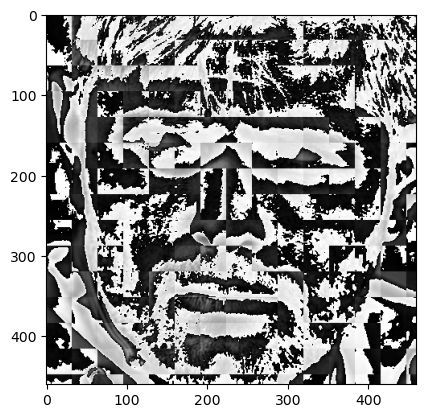

In [9]:
imx = '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Babar_Azam/Babar_Azam2.jpg'
imx = cv2.imread(imx)

def w2d(imx, mode='haar', level=1):
    image_array = imx
    image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    
    # convert image to float
    image_array = np.float32(image_array)
    image_array /= 255
    
    #compute coefficients
    coeffs = pywt.wavedec2(image_array, mode, level=level)
    
    #Process coefficients
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    #Reconstruct Images
    image_array_H = pywt.waverec2(coeffs_H, mode)
    image_array_H *= 255
    image_array_H = np.uint8(image_array_H)
    
    return image_array_H

x = w2d(imx, 'db1', 5)
plt.imshow(x, cmap='gray')


In [18]:
cricketer_file_names_dict

{'Virat_Kohli': ['/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli1.jpg',
  '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli2.jpg',
  '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli3.jpg',
  '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli4.jpg',
  '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli5.jpg',
  '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli6.jpg',
  '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli7.jpg',
  '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli8.jpg',
  '/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli9.j

In [19]:
class_dict = {}
count = 0
for cricketer_name in cricketer_file_names_dict.keys():
    class_dict[cricketer_name] = count
    count += 1
class_dict

{'Virat_Kohli': 0,
 'Babar_Azam': 1,
 'Chris_Gayle': 2,
 'Rohit_Sharma': 3,
 'Sachin_Tendulkar': 4,
 'David_Warner': 5}

In [20]:
x = []
y = []


for cricketer_name, training_files in cricketer_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_image = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_image.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)))
        x.append(combined_img)
        y.append(class_dict[cricketer_name])

[ WARN:0@953.737] global loadsave.cpp:248 findDecoder imread_('/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli28.jpg'): can't open/read file: check file path/integrity
[ WARN:0@953.760] global loadsave.cpp:248 findDecoder imread_('/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Virat_Kohli/Virat_Kohli35.jpg'): can't open/read file: check file path/integrity
[ WARN:0@953.993] global loadsave.cpp:248 findDecoder imread_('/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Rohit_Sharma/Rohit_Sharma8.jpg'): can't open/read file: check file path/integrity
[ WARN:0@954.008] global loadsave.cpp:248 findDecoder imread_('/home/kushal/Python/Projects/Classifier/Cricketer_Classifier/Cropped_Images/Rohit_Sharma/Rohit_Sharma13.jpg'): can't open/read file: check file path/integrity
[ WARN:0@954.108] global loadsave.cpp:248 findDecoder imread_('/home/kushal/Python/Projects/Classifier/Cricketer_Clas

In [21]:
len(x[0])

4096

In [22]:
x = np.array(x).reshape(len(x), 4096).astype(float)
x.shape

(205, 4096)

### Training Process

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 9))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7115384615384616

In [40]:
len(X_test)

52

In [41]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.52      0.93      0.67        15
           1       0.86      0.67      0.75         9
           2       1.00      0.50      0.67         2
           3       1.00      0.33      0.50         9
           4       0.92      0.80      0.86        15
           5       1.00      0.50      0.67         2

    accuracy                           0.71        52
   macro avg       0.88      0.62      0.68        52
weighted avg       0.81      0.71      0.71        52



### Finding out the best model

In [43]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [47]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [48]:
import pandas as pd

scores = []
best_estimators = {}

for algo,mp  in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.732043,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.587957,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.686667,{'logisticregression__C': 1}


In [49]:
best_estimators 

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [50]:
best_estimators['svm'].score(X_test, y_test)

0.7115384615384616

In [51]:
best_estimators['random_forest'].score(X_test, y_test)

0.5384615384615384

In [52]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8076923076923077

In [53]:
best_clf = best_estimators['logistic_regression']

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  1,  1,  0,  1,  1],
       [ 0,  9,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  6,  1,  1],
       [ 1,  0,  0,  1, 12,  1],
       [ 0,  0,  0,  0,  0,  2]])

Text(95.72222222222221, 0.5, 'Truth')

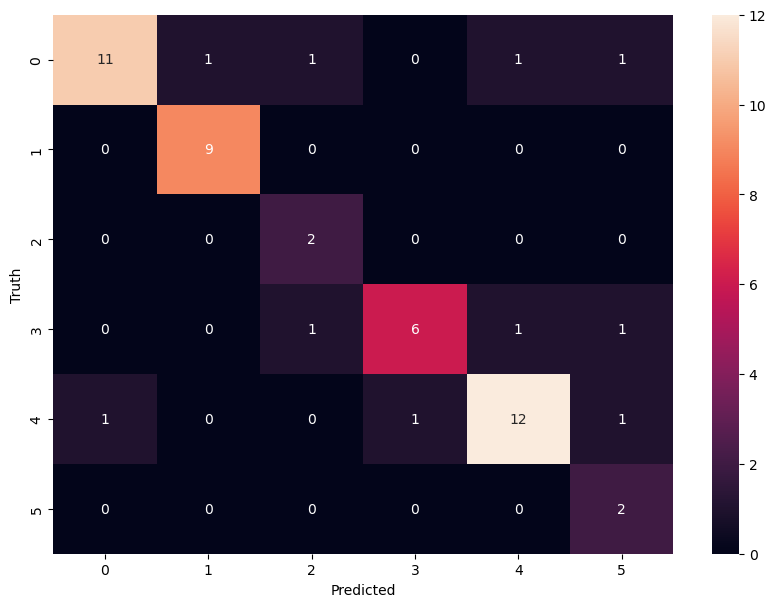

In [55]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Save the trained model

In [56]:
import joblib

In [57]:
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

### Save the class dictionary

In [59]:
import json
with open("class_dict.json", "w") as f:
    f.write(json.dumps(class_dict))